<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Arturo Lazcano
- Nombre de alumno 2: ---


**NOTA:** Mi compañero de trabajo (Diego Dominguez) tuvo un problema asistiendo a las instrucciones. Es por esto que hago entrega de este trabajo yo. Sin embargo, a esta altura del semestre es difícil encontrar una persona que esté sola por lo tanto me disculpo por entregar sin una pareja.

Saludos!

### **Link de repositorio de GitHub:** `https://github.com/ALazcanoG/MDS7202`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [98]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv.zip')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [99]:
!pip install xgboost

In [100]:
# Dimensiones del dataframe
fil, col = df.shape
print(f'El dataframe tiene {fil} filas y {col} columnas')

El dataframe tiene 70692 filas y 18 columnas


In [101]:
# Valores nulos
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [102]:
# Información del dataframe para ver posibles columnas a preprocesar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [103]:
# Descripción de las columnas numéricas del dataframe
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
# Cantidad de valores únicos por columna
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

Con esta pequeña exploración del dataset, se concluye que no necesita preprocesamiento en los tipos de los datos, ya que estos vienen de forma numérica. Así, se considera que la única variable a preprocesar es `GenHlth`.  
Por otro lado, se observa que no hay nulos en la base de datos por lo que no hay que remover filas ni similares.  

Sobre el preprocesamiento de los datos, estandarizar o escalarlos en general es una buena práctica, sin embargo, al estar trabajando con el clasificador `XGBoost`, no es necesario ya que su mecanismo funciona con árboles de decisión, los cuales no se ven afectados por la escala de los datos.

### Imports

In [105]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import xgboost as xgb

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
import matplotlib.pyplot as plt
!pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [106]:
# Preprocesamiento
preprocessing_transformer = ColumnTransformer(transformers=[
    ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'), ['GenHlth'])],
    #('scaler', StandardScaler(), column_int)],
    remainder='passthrough')

In [107]:
# Crear pipeline con xgboost
pipeline = Pipeline([
    #("preprocesamiento", preprocessing_transformer),
    ("XGBoost", xgb.XGBClassifier()),
    ])

In [108]:
# Definir input y label
X =  df.drop(columns=['Diabetes'])
y = df.loc[:, "Diabetes"]

In [109]:
# Balance del dataframe
y.value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

In [110]:
# Definir train set y test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, stratify=y)

In [111]:
# Entrenamos
pipeline.fit(X_train, y_train)

Pipeline(steps=[('XGBoost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [112]:
# Predecimos
y_pred = pipeline.predict(X_test)

In [113]:
# Evaluamos
print('Metricas para clasificador XGBoost')
print(classification_report(y_pred, y_test))

Metricas para clasificador XGBoost
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      9666
           1       0.79      0.73      0.76     11542

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



En la celda de código anterior se puede ver el rendimiento del clasificador XGBoost. Como se puede apreciar, este tiene métricas bastante decentes para prácticamente no haber tratado ni procesado el dataset.  
En general, en los casos clínicos, lo importantes es no tener falsos negativos, pues el caso en que un paciente tenga una enfermedad y el algoritmo prediga que no la tiene es un caso mucho peor que predecir que la tiene cuando en verdad no es así. Es por esto que, en general, la métrica que nos importa es el recall.  

Simplemente con estas métricas no se puede asegurar que el modelo entienda las features importantes para la predicción. Solamente sirve como un predictor más "duro" en cuanto a métricas y resultados se refiere.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

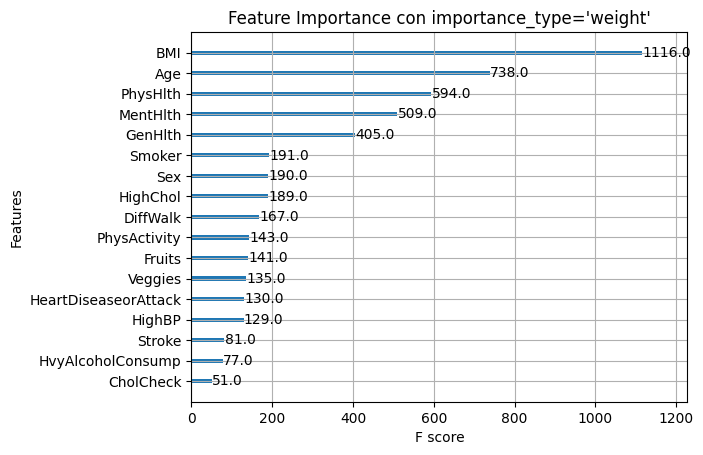

In [114]:
# Importancia de fetures con tipo "weight"
xgb.plot_importance(pipeline['XGBoost'], max_num_features=17)
plt.title("Feature Importance con importance_type='weight'")
plt.show()

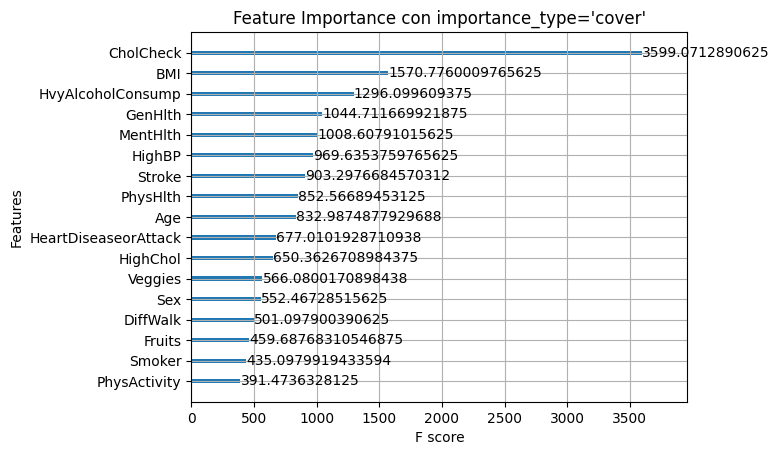

In [115]:
# Importancia de fetures con tipo "cover"
xgb.plot_importance(pipeline['XGBoost'], max_num_features=17, importance_type="cover")
plt.title("Feature Importance con importance_type='cover'")
plt.show()

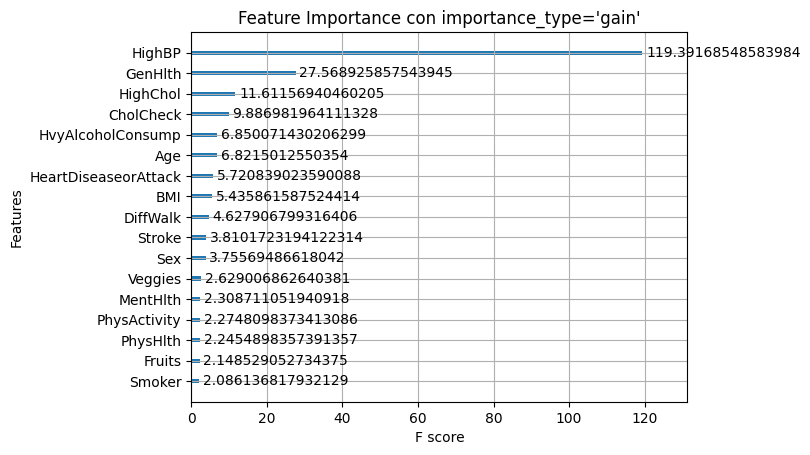

In [116]:
# Importancia de fetures con tipo "gain"
xgb.plot_importance(pipeline['XGBoost'], max_num_features=17, importance_type="gain")
plt.title("Feature Importance con importance_type='gain'")
plt.show()

Los 3 gráficos mostrados anteriormente indican lo siguiente:


*   Tipo "weight": La variable con mayor importancia para predecir es `BMI` mientras que la menos importante es `CholCheck`.
*   Tipo "cover": La variable con mayor importancia para predecir es `CholCheck` mientras que la menos importante es `DiffWalk`.
*   Tipo "gain": La variable con mayor importancia para predecir es `HighBP` mientras que la menos importante es `Fruits`.

Acá, se debe mencionar que cada tipo de importancia refiere a diferentes cosas. En caso de "weight", es el porcentaje que representa el número relativo de la cantidad de veces que una feature en particular ocurre en los árboles del modelo.  
El tipo "cover" (coverage) se refiere a al número relativo de observaciones relacionada a esta feature.  
Por último, el tipo "gain" refiere a la contribución relativa de la feature correspondiente. Estas se calculan viendo cada contribución de las features por cada árbol en el modelo.  

Así, los resultados tienen sentido pues, como la variable `CholCheck` es binaria, se obtiene solamente en un nivel de los árboles obteniendo así poco peso (weight), pero alta importancia en las otras 2 métricas.  

En el caso de los árboles, estas son buenas formas de medir importancia de features de manera global, sin embargo, pueden inducir el error antes mencionado, es decir, que una característica posea muchos valores, apareciendo más veces en los árboles alterando los resultados esperados.



## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [117]:
# Método de permutación
clf = pipeline['XGBoost']
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)

In [118]:
# Printear resultado
result

{'importances_mean': array([2.94134289e-02, 1.16622658e-03, 1.00952471e-02, 3.68571608e-03,
        3.23541431e-02, 5.50106878e-05, 2.94857287e-03, 3.45781466e-05,
        1.36740853e-03, 7.87438702e-04, 4.01892368e-03, 5.76857790e-02,
        9.24179555e-04, 1.73362253e-03, 3.60870112e-03, 1.55916007e-03,
        1.72906450e-02]),
 'importances_std': array([0.00192117, 0.00081168, 0.00109574, 0.00057066, 0.00133344,
        0.0008002 , 0.00077715, 0.00063727, 0.00061128, 0.00066585,
        0.00062384, 0.00218955, 0.00088118, 0.00100259, 0.00076417,
        0.00044565, 0.00145827]),
 'importances': array([[ 3.04602037e-02,  3.11203320e-02,  3.20162203e-02,
          2.67351943e-02,  2.83383629e-02,  2.88098831e-02,
          3.17333082e-02,  2.64994342e-02,  2.58393059e-02,
          2.86684270e-02,  2.65465862e-02,  2.78668427e-02,
          2.92814032e-02,  2.77725387e-02,  2.93757073e-02,
          2.93285553e-02,  3.08845719e-02,  3.14032441e-02,
          2.94700113e-02,  3.05545

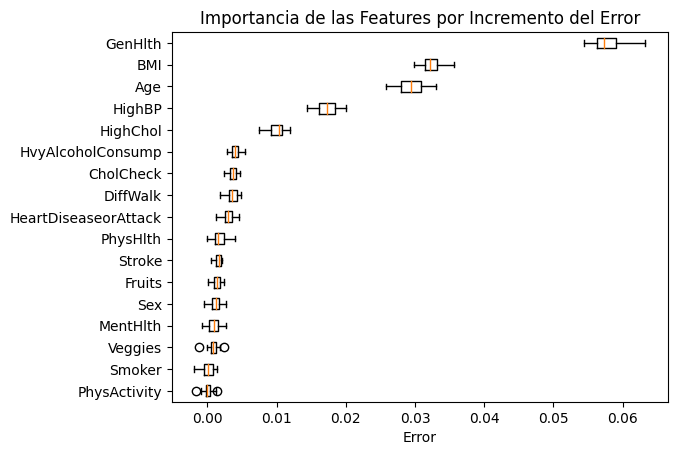

In [119]:
# Boxplot de importancia de variables
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

Este modelo (*permutation importance*) calcula la importancia midiendo el error obtenido en la predicción del modelo después de haber permutado valores en las features.  
Como es usual, se puede ver en la desviación estándar el error o disperisón obtenida después de haber hecho el método de permutación 30 veces. Así, una menor std indica que la característica no varía mucho en importancia a pesar de haber permutado valores.  

Así, en el grafico anterior se pueden ver los resultados. Estos indican que las 5 features con mayor importancia son: `GenHlth`, `BMI`, `Age`, `HighBP` y `HighChol`. Esto tiene sentido con los métodos vistos anteriormente y también en el ámbito médico, pues son características claves a la hora de ver posible diabetes en un paciente.  

Se puede ver que estos resultados son muy similares a los obtenidos por el tipo "gain" de la sección anterior, indicando que este tipo es una de las mejores opciones y menos sesgadas. Por otro lado, el tipo "weight" tiene el problema antes comentado de la cantidad de valores únicos por variable.  

Ventajas del modelo de permutación:
*   No se necesita reentrenar por lo cual no usa mucha memoria.
*   Fácil interpretabilidad pues el gráfico indica las features más importantes.
*   Es comparable con otros modelos, es decir, se puede ejecutar cambiando el clasificador en este caso.

Desventajas del modelo de permutación:
*   Alto costo computacional pues genera cambios de valores y a cada iteración calcula errores de todas las features.
*   No considera la correlación de variables produciendo sesgos.
*   Solo considera el error considerado en el modelo y no otras opciones.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [120]:
!pip install shap

In [121]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [122]:
import shap

In [123]:
# Para este caso como estamos usando boosting, usamos árboles´
clf = pipeline['XGBoost']
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [124]:
# Printeamos shap values
shap_values

.values =
array([[-0.9386113 ,  0.04039542, -0.3015774 , ..., -0.0228567 ,
        -0.01757826,  0.6097766 ],
       [ 0.16170251,  0.06481645,  0.16231291, ..., -0.08429605,
         0.15366167,  0.4280316 ],
       [ 1.0423236 ,  0.22932585, -0.28725162, ..., -0.11854113,
        -0.02507952, -0.6961388 ],
       ...,
       [-0.04374053, -0.08638097,  0.20948647, ...,  0.29286507,
        -0.02957287,  0.4988279 ],
       [ 0.24221303, -0.09631573,  0.32812235, ...,  0.24263906,
        -0.03187338,  0.5780807 ],
       [ 0.1516027 , -0.05360221,  0.184518  , ..., -0.12280452,
        -0.02536807,  0.5600673 ]], dtype=float32)

.base_values =
array([-0.00843686, -0.00843686, -0.00843686, ..., -0.00843686,
       -0.00843686, -0.00843686], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

En los SHAP values, si fijamos una instancia $x_i$, cada valor indica el aporte de la variable a la predicción final, sin embargo, esto es con respecto a un valor base. Por ejemplo, un valor SHAP positivo podría significar que la característica aumenta la predicción del modelo, o podría significar que la característica disminuye la predicción del modelo en una cantidad menor que el valor base.  
Los valores negativos señalan aportes negativos para detectar el target. Por otro lado, los positivos señalan variables que entregan un aporte positivo a la detección de diabetes.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [125]:
# Instancia 1
idx = 1

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X.iloc[idx,:],
                link="logit")

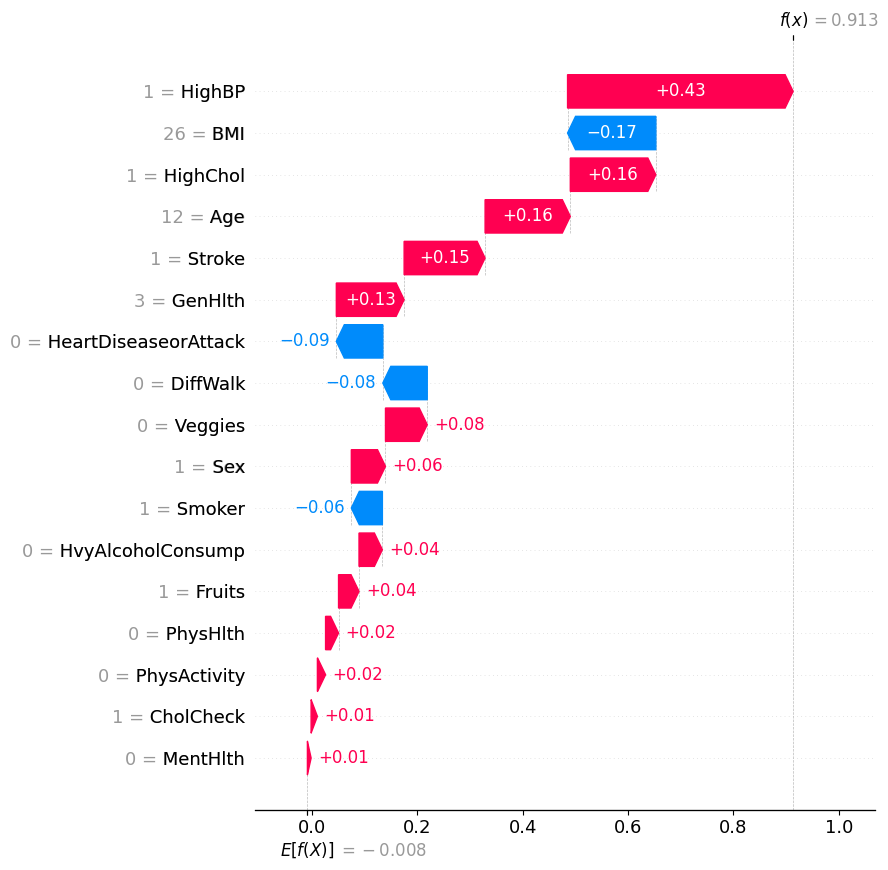

In [126]:
# Segundo gráfico (otra forma de verlo) para instancia 1
idx=1
shap.plots.waterfall(shap_values[idx,:],
                     max_display=18)

In [127]:
# Instancia 9
idx = 9

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X.iloc[idx,:],
                link="logit")

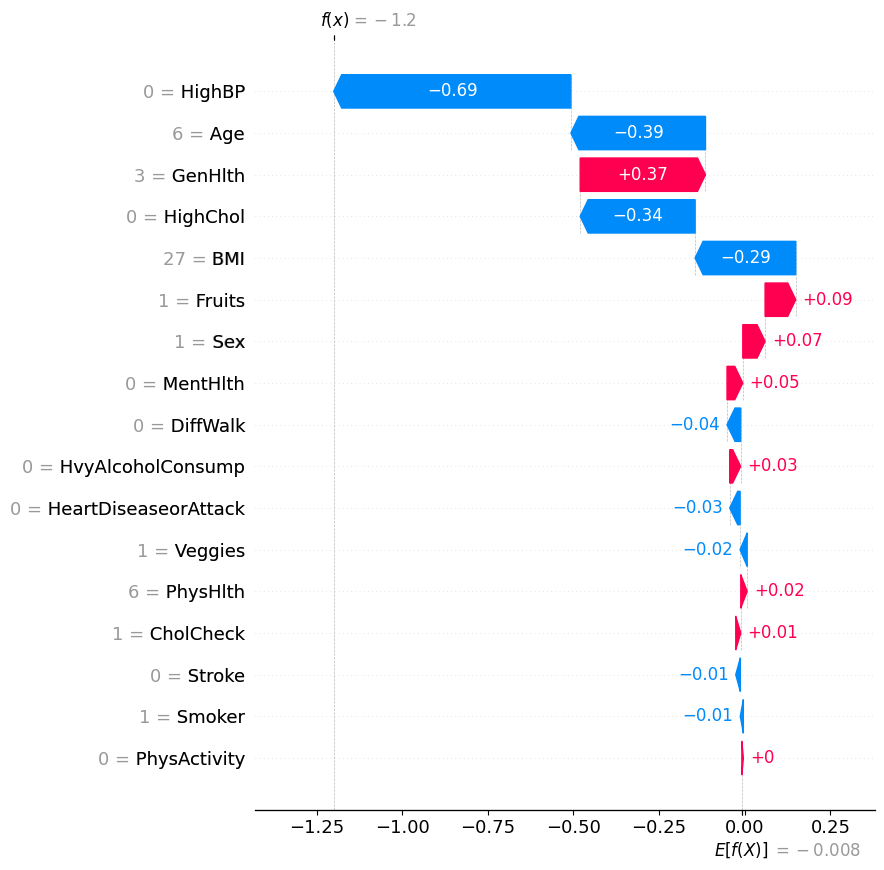

In [128]:
# Segundo gráfico (otra forma de verlo) para instancia 9
idx=9
shap.plots.waterfall(shap_values[idx,:],
                     max_display=18)

In [129]:
# Instancia 150
idx = 150

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X.iloc[idx,:],
                link="logit")

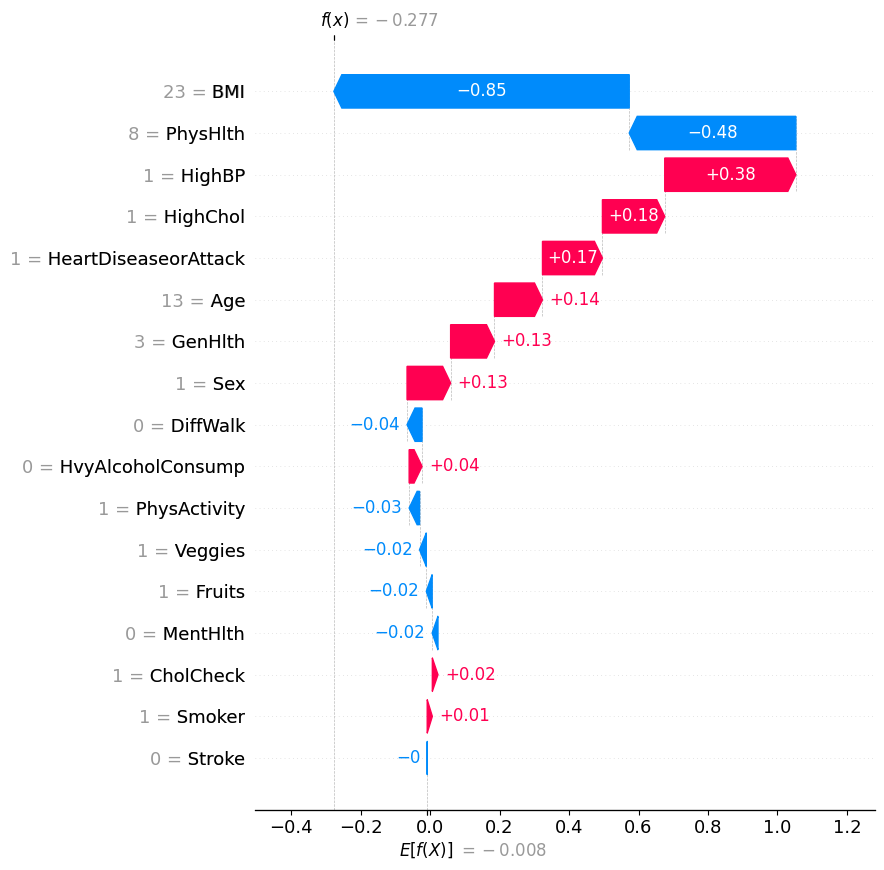

In [130]:
# Segundo gráfico (otra forma de verlo) para instancia 150
idx=150
shap.plots.waterfall(shap_values[idx,:],
                     max_display=18)

En los gráficos anteriores se pueden ver los aportes de cada feature a la predicción final del modelo de dos formas disintas. Así, observando los resultados se puede ver como, por ejemplo, la variable `GenHlth` aporta en los 3 casos positivamente a la detección de diabtes.  
Por el contrario, variables como `HighBP` tienen aportes positivos y negativos dependiendo de la instancia que estemos analizando, sin embargo, esta siempre es un valor alto en valor absoluto.  
Con esto, se puede concluir que sigue la misma línea que los métodos anteriores, indicando que las columnas importantes son `GenHlth`, `BMI`, `Age`, `HighBP` y `HighChol`, sin embargo, como este análisis es de forma local, se pueden ver otras features aportanto más que estas mencionadas y debido a esto es que es difícil generalizar estas observaciones a todos los datos.  
Así, para poder generalizar habría que analizar cada instancia y esto es lo que sigue en la siguiente tarea.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

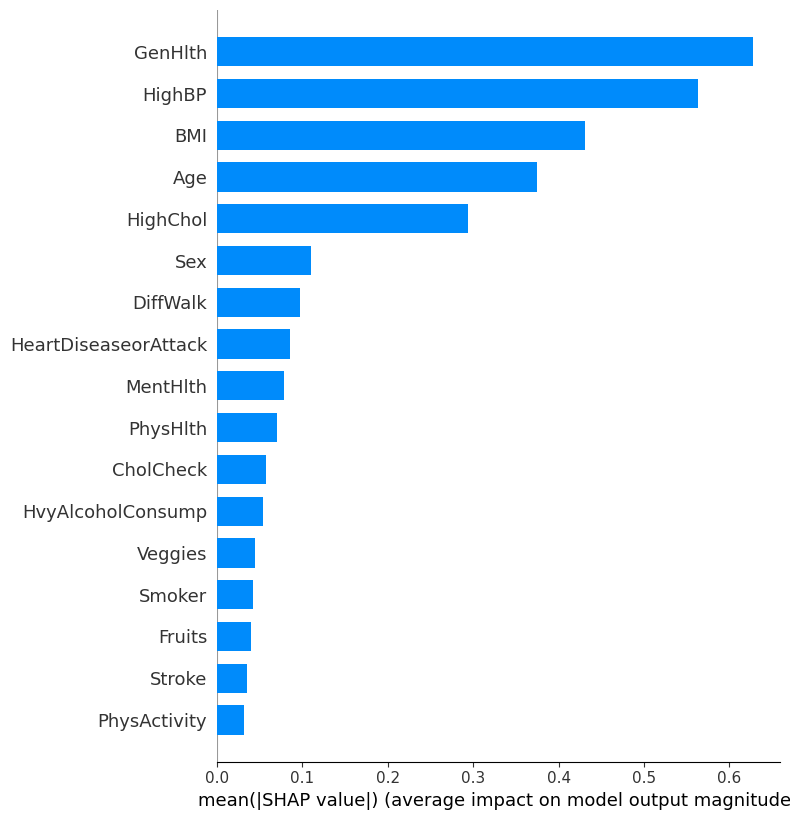

In [131]:
# Gráfico de barra para el aporte global
shap.summary_plot(shap_values, X, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


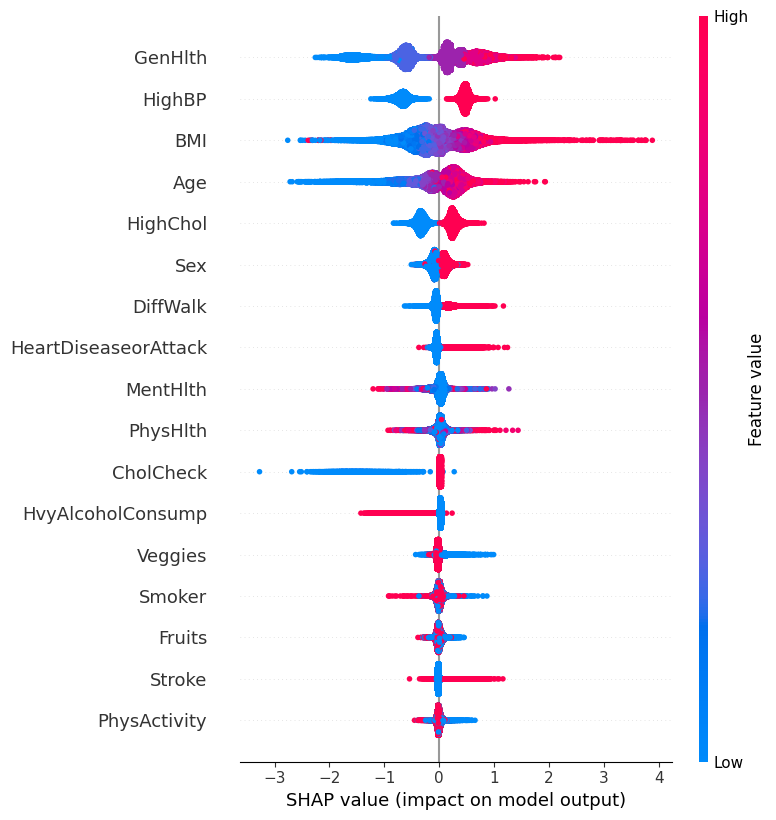

In [132]:
# Gráfico de violín para el aporte global
shap.summary_plot(shap_values, X)

Como estos gráficos actúan de forma global, se alinean más con los resultados obtenidos en las secciones anteriores pues las mismas características `GenHlth`, `BMI`, `Age`, `HighBP` y `HighChol` son seleccionadas como las más importantes.  

La gran diferencia es que esto es un promedio de cada instancia local. Por lo tanto se espera que pueda generalizar de mejor manera, pero puede perder cierta información que tiene cada instancia. Por ejemplo, se vió que el paciente con id 9 no seguía esta generalización.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [133]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

In [134]:
# Revisamos las features
feature_importance_names

Index(['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'Sex', 'DiffWalk',
       'HeartDiseaseorAttack', 'MentHlth', 'PhysHlth', 'CholCheck',
       'HvyAlcoholConsump', 'Veggies', 'Smoker', 'Fruits', 'Stroke',
       'PhysActivity'],
      dtype='object')

In [135]:
# Elegir las primeras 5 features más importantes
features_mas_importantes = feature_importance_names[:5]
features_mas_importantes

Index(['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol'], dtype='object')

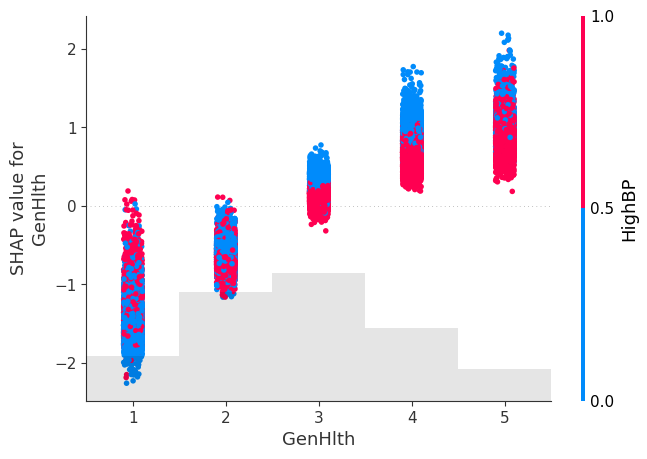

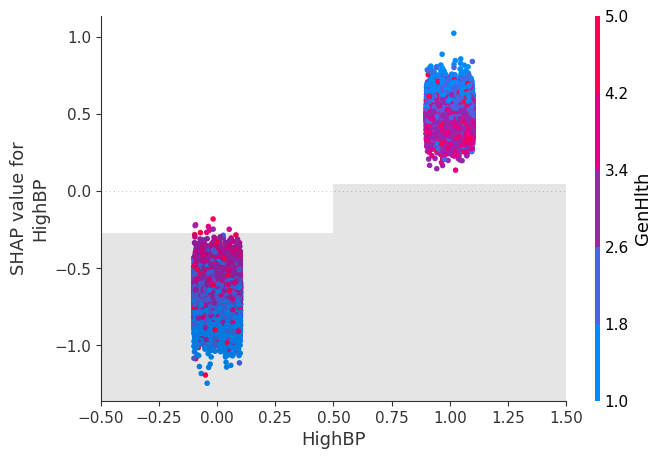

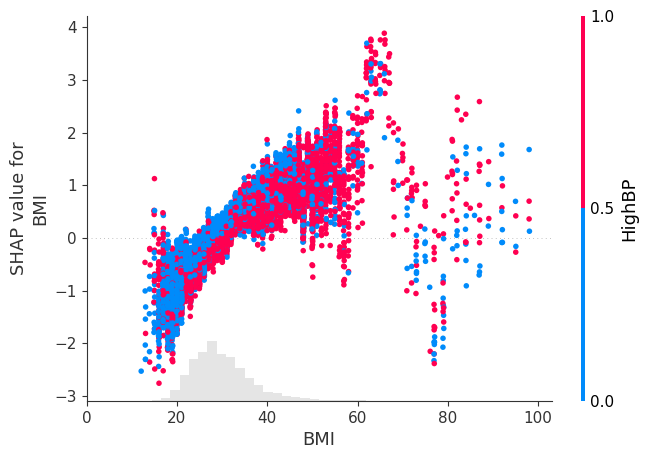

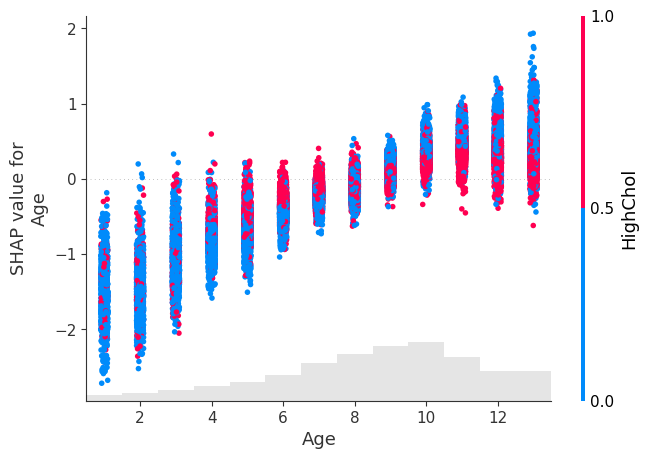

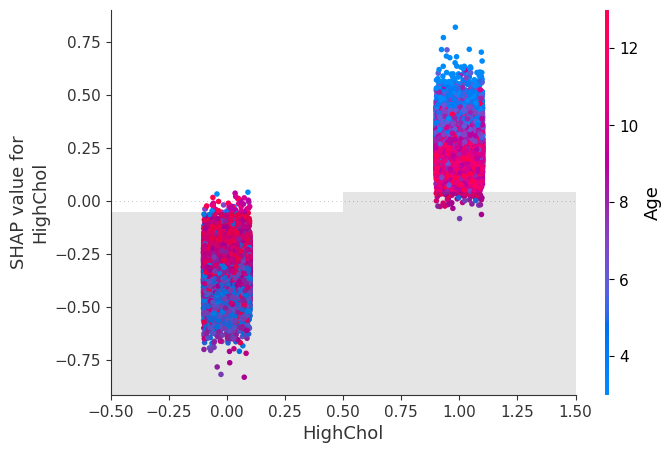

In [136]:
# Scatter plot de las 5 features más importantes
for name in features_mas_importantes:
    shap.plots.scatter(shap_values[:,name],
                       color=shap_values, xmin=0)

# Si se quiere colorear por probabilidad, el parámetro color debe ser

# color_pred_probability = clf.predict_proba(X)[:, 1]
# color = color_pred_probability


Con estos resultados, se puede ver que para las features más importantes seleccionadas, el algoritmo calcula la feature con mayor interacción a modo de colorear el scatter plot. Así, se pueden comparar dos features importantes y ver la distribución de los datos.  
Por ejemplo, se puede ver que para edades bajas, el colesterol no suele ser alto, sin embaego, mientras vamos aumentando la edad, esta distribución de gente con alto colesterol tiende (graficamente) al 50-50.

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

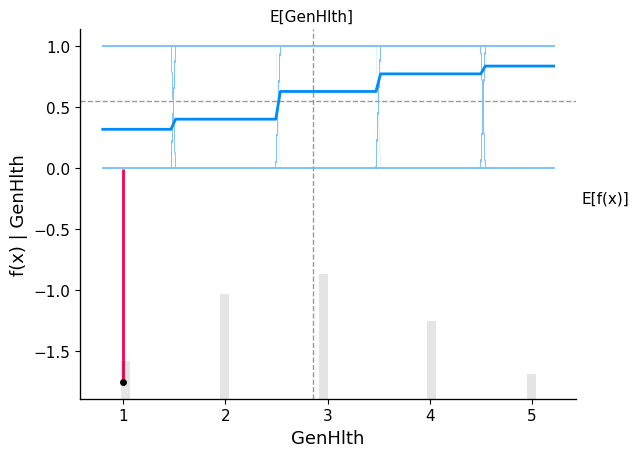

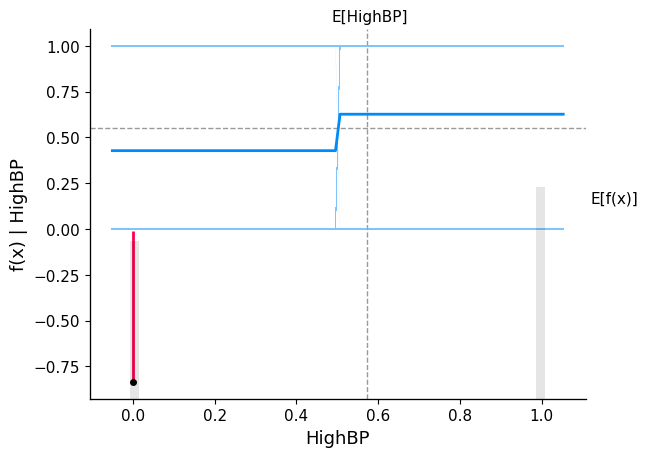

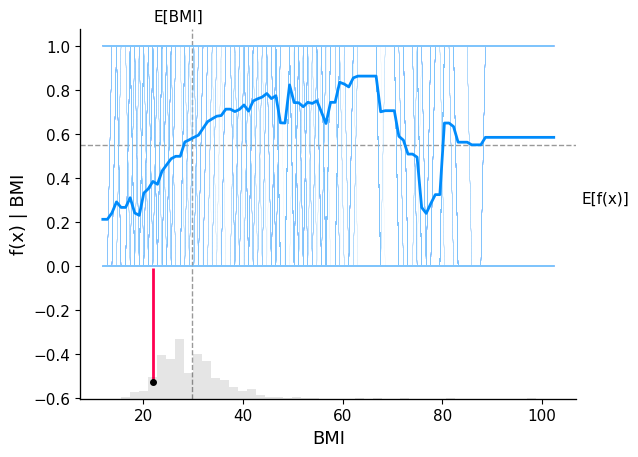

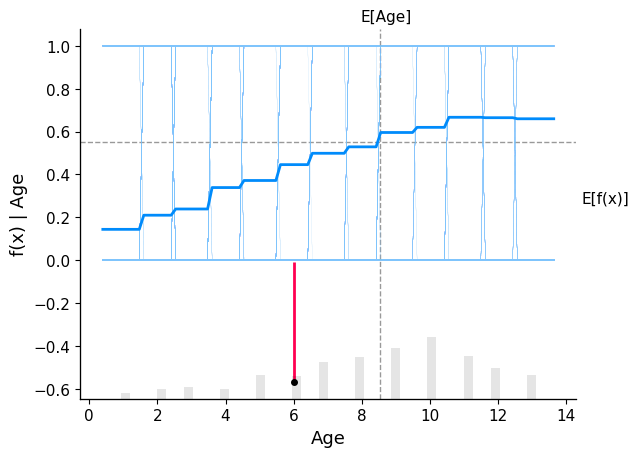

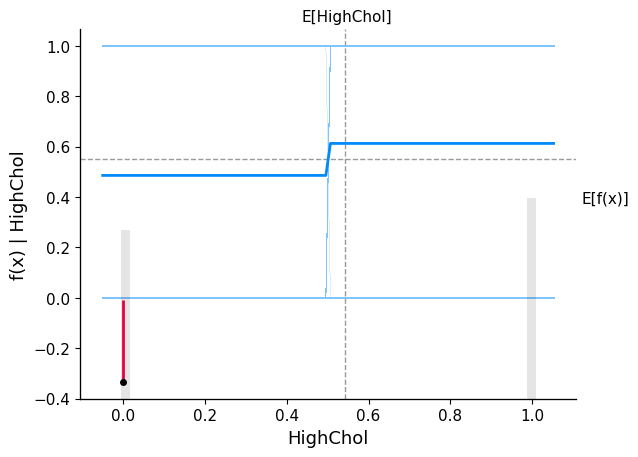

In [137]:
X_sample = shap.utils.sample(X, 1000)

sample_ind = 20
for name in features_mas_importantes:
  shap.partial_dependence_plot(
      name, clf.predict, X_sample, model_expected_value=True,
      feature_expected_value=True, ice=True,
      shap_values=shap_values[sample_ind:sample_ind+1,:]
  )

Acá se puede notar como, en general, cualquiera de estas variables seleccionadas (más importantes) que aumente en valor, la probabilidad de tener diabetes aumenta. Aquí, las variables `HighBP` y `HighChol` son más o menos lineales, pero con un valor positivo. Por otro lado, las variables `Age` y `GenHlth` se ven monótonas crecientes en forma de escalera, sin embargo, esto se debe a la segmentación y valores únicos que poseen estas columnas. Por ejemplo, si la edad fuese más continua, tendería a veerse como una linea con pendiente positiva en vez de una curva tipo escalera.  
Por el contrario, la característica `BMI` es la más complicada, indicando un comportamiento no lineal con respecto a la predicción de diabetes.  

Como su nombre indica, partial dependance plots son gráficos que analizan dependiencia de solamente una o dos features. Es por esto que se deben ver muchas variables más para entrar a generalizar y ver posibles patrones en la detección de diabetes, sin embargo, cada gráfico muestra una tendencia global de la característica con respecto al padecimiento de diabetes.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [138]:
!pip install alibi

In [139]:
from alibi.explainers import AnchorTabular

In [140]:
# Inserte su código para generar sistema de reglas aquí

predict_fn = lambda x: clf.predict(x)
explainer = AnchorTabular(predict_fn, clf.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())
class_names = ["No diabético", "Diabético"] # orden {0, 1}

idx = 1000
# explicar predicción idx 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print(f'Paciente id: {idx}')
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('\n')

idx = 3001
# explicar predicción idx 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print(f'Paciente id: {idx}')
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('\n')

idx = 5751
# explicar predicción idx 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print(f'Paciente id: {idx}')
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('\n')

Paciente id: 1000
Prediction:  Diabético
Anchor: BMI > 33.00 AND HighBP > 0.00 AND HighChol > 0.00
Precision: 0.98
Coverage: 0.11


Paciente id: 3001
Prediction:  No diabético
Anchor: Age <= 7.00 AND HighChol <= 0.00 AND GenHlth <= 3.00 AND PhysActivity > 0.00 AND HeartDiseaseorAttack <= 0.00 AND Fruits > 0.00
Precision: 0.95
Coverage: 0.09


Paciente id: 5751
Prediction:  Diabético
Anchor: GenHlth > 3.00 AND HighChol > 0.00 AND BMI > 25.00
Precision: 0.99
Coverage: 0.15




En estos resultados se puede ver como para el paciente de id 1000, su predicción es que no posee diabetes, donde esta predicción se basa mayormente en que la variable `GenHealth` es $\leq 2$, su edad es $\leq 7$ y que su BMI es $\leq 29$.  
Por otro lado, la predicción del paciente con id 3001 es la misma, sin embargo, la explicación viene dada por otras características como vienen siendo `HighBp` $> 0$, es decir, 1. Mientras que la variable `GenHlth` vuelve a aparecer pero con un umbral de decisión distinto.  
Por otro lado, la predicción del paciente con id 5741 es que tiene diabetes, y esta decisión se basa en que a variable `HeartDiseaseorAttack` es $>0$, `DiffWalk` es $>0$ y que `HighBP` es $>0$, es decir, todas estas variables son $1$ pues recordemos que son binarias.  

Este algoritmo toma en cuenta la precisión de su predicción y una cobertura, es decir, también tiene la interpretación de vecindad (pacientes con similares características).  
En los resultados anteriores se puede ver como la precisión es bastante buena ($>0.95$), sin embargo, la cobertura es muy dependiente de los datos del paciente. Por ejempo, el paciente de id 3001 posee cobertura de 0.2, es decir, hay un porcentaje considerable que se puede explicar con esa elección de reglas mientras que para los otros dos pacientes, su cobertura es baja indicando que, aunque hayan pacientes con características similares, usar el mismo conjunto de reglas no es óptimo para predecir la variable target.

# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

En este laboratorio se han utilizado una gran variedad de métodos de obtención de importancia de características. Así, comparando estos métodos, ya sean globales o locales, los algoritmos con que entregan mejores resultados son el plot_importance del modulo xgboost con tipo "gain", el método de permutación y el uso de SHAP values para análisis globales, mientras que para análisis local, nuevamente SHAP values junto con el sistema de reglas entregan muy buenos resultados.  

Dado el problema inicial para predecir la diabetes, considerar métodos agnósticos locales puede ser útil pues un paciente que tenga características similares puede ser más valioso en términos de la predicción que generalizar usando lo obtenido con métodos globales ya que estos sirven más para explicar lo que hace el modelo a grandes rasgos.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>